### Problem 5

Choose and fit one or more models to quantify the relationship betweem income (GDP per capita) and child
mortality over time. Justify your choice of model and comment on its appropriateness. (You are not required
to handle the autocorrelation of time series, but should comment on how this impacts your analysis.)

Visualize the model(s) and comment on what they tell you about the relationship between income and child
mortality over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data on gdp and life expectancy
all_gdp = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--datapoints--alternative_gdp_per_capita_ppp_pwt_8_0--by--geo--time.csv")
all_ch_mor = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv")

In [3]:
for col in all_gdp.columns[:-1]:
    assert all_gdp[col].dtype == all_ch_mor[col].dtype

In [4]:
gdp_ch_mor = pd.merge(all_gdp, all_ch_mor, how = 'left', left_on = ["geo", "time"], right_on = ["geo", "time"])

In [5]:
gdp_ch_mor = gdp_ch_mor.rename({'alternative_gdp_per_capita_ppp_pwt_8_0':'gdp', 'child_mortality_0_5_year_olds_more_years_version_7':'child_mortality'}, axis = 1)

In [6]:
# Eliminate data where gpd or child mortality is 0
gdp_ch_mor = gdp_ch_mor[(gdp_ch_mor["gdp"] > 0) & (gdp_ch_mor["child_mortality"] > 0)]

In [7]:
all_country = pd.read_csv('/Users/alefiyanaseem/Desktop/Data Visualization/ddf--gapminder--systema_globalis/ddf--entities--geo--country.csv')

In [8]:
gdp_ch_mor = pd.merge(gdp_ch_mor,all_country[['country', 'world_4region']], left_on = 'geo', right_on = 'country')

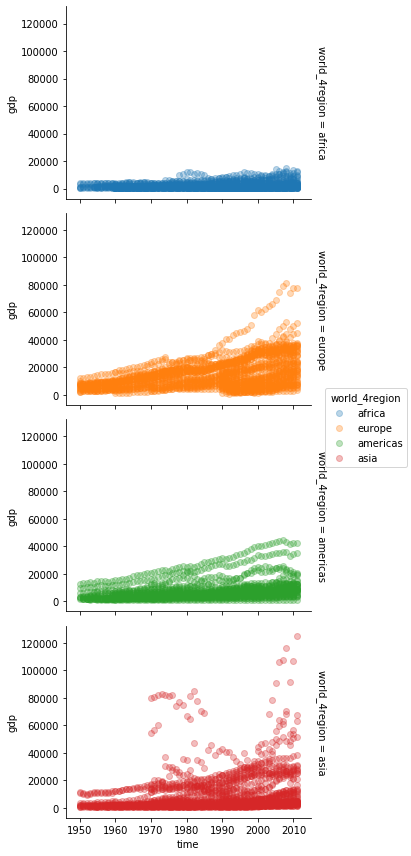

In [9]:
import seaborn as sns
fg = sns.FacetGrid(data=gdp_ch_mor[['gdp',
                                  'time', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61)

fg.map(plt.scatter, 'time', 'gdp',
        alpha = 0.3).add_legend()

In [10]:
gdp_ch_mor.columns

Index(['geo', 'time', 'gdp', 'child_mortality', 'country', 'world_4region'], dtype='object')

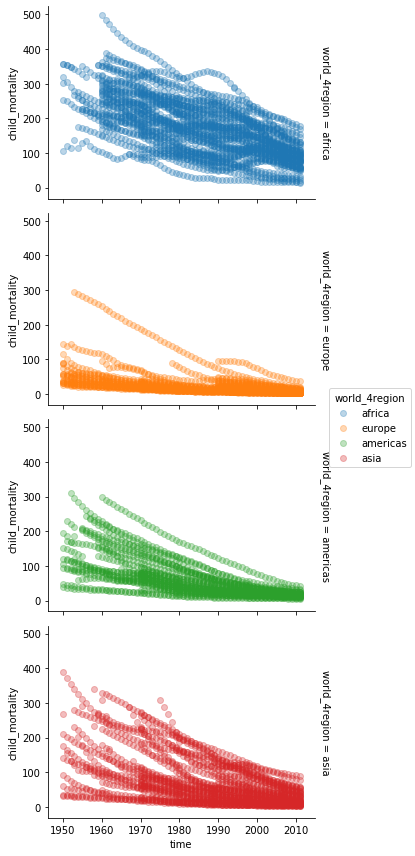

In [11]:
import seaborn as sns
fg = sns.FacetGrid(data=gdp_ch_mor[['child_mortality',
                                  'time', 'world_4region']],
                       hue='world_4region', row = 'world_4region',
                       margin_titles = True,
                       aspect=1.61)

fg.map(plt.scatter, 'time', 'child_mortality',
        alpha = 0.3).add_legend()

In [12]:
# Group by time
gdp_ch_mor_group = gdp_ch_mor.groupby("time").mean()

In [13]:
gdp_ch_mor_group

,gdp,child_mortality
time,,
1950,4930.723077,125.592564
1951,4829.347500,118.197000
1952,4808.021951,118.237561
1953,4711.134783,122.685217
1954,4725.269388,118.592245
1955,4499.450000,131.082857
1956,4604.501786,126.266786
1957,4732.726786,121.130893
1958,4635.153448,122.675345


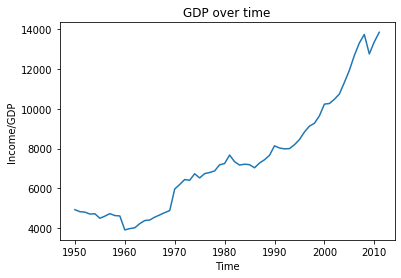

In [14]:
plt.plot(gdp_ch_mor_group["gdp"])
plt.title("GDP over time")
plt.xlabel("Time")
plt.ylabel("Income/GDP")
plt.show()

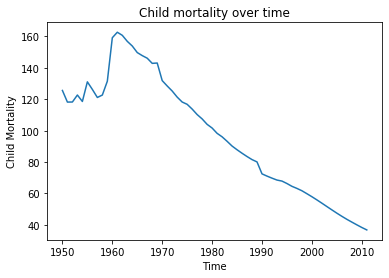

In [15]:
plt.plot(gdp_ch_mor_group["child_mortality"])
plt.title("Child mortality over time")
plt.xlabel("Time")
plt.ylabel("Child Mortality")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(gdp_ch_mor_group["child_mortality"].to_numpy().reshape(-1,1)
                                                    , gdp_ch_mor_group["gdp"].to_numpy().reshape(-1,1), 
    test_size=0.3,random_state =1 )
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  0.8416527382788712
Residual sum of squares: 1095149.53


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


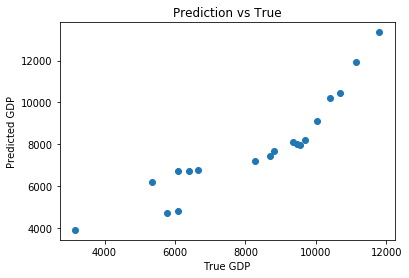

In [18]:
plt.scatter(grid.predict(X_test),y_test)
plt.title("Prediction vs True")
plt.xlabel("True GDP")
plt.ylabel("Predicted GDP")
plt.show()

In [19]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=gdp_ch_mor_group)
model_fit = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(gdp_ch_mor_group["child_mortality"].to_numpy().reshape(-1,1)))

/anaconda3/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [22]:
#converting predictions to dataframe
cols = gdp_ch_mor_group.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)
for j in range(0,2):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], gdp_ch_mor_group[i])))

rmse value for gdp is :  43669.213464564564
rmse value for child_mortality is :  452.4327603287886


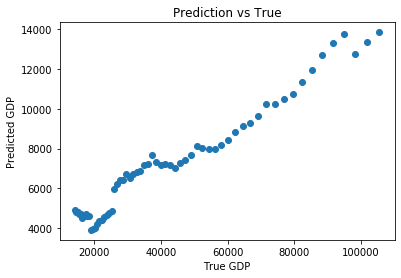

In [23]:
plt.scatter(pred["gdp"], gdp_ch_mor_group["gdp"])
plt.title("Prediction vs True")
plt.xlabel("True GDP")
plt.ylabel("Predicted GDP")
plt.show()

Before the Modern Revolution child mortality was very high in all societies that we have knowledge of – a quarter of all children died in the first year of life, almost half died before reaching the end of puberty. Whether in Ancient Rome; Ancient Greece; the pre-Columbian Americas; Medieval Japan or Medieval England; the European Renaissance; or Imperial China: Every fourth newborn died in the first year of life. One out of two died in childhood.

During the last century the global mortality at a young age declined 10-fold. Over the last two centuries all countries in the world have made very rapid progress against child mortality. From 1800 to 1950 global mortality has halved from around 43% to 22.5%. Since 1950 the mortality rate has declined five-fold to 4.5% in 2015. All countries in the world have benefitted from this progress.

Child mortality in rich countries today is much lower than 1%. This is a very recent development and was only reached after a hundredfold decline in child mortality in these countries. In early-modern times, child mortality was very high; in 18th century Sweden every third child died, and in 19th century Germany every second child died. With declining poverty and increasing knowledge and service in the health sector, child mortality around the world is declining very rapidly: Global child mortality fell from 19% in 1960 to just below 4% in 2017; while 4% is still too high, this is a substantial achievement.

One reason why we do not hear about how global living conditions are improving in the media is that these are the slow processes that never make the headlines: A century ago every third child died before it was five years old, almost a century later the child mortality rate has fallen to 4%. We will not learn about this development from the news as such a slow development is never fast enough to make a headline. The headline that could have been published on every average day in the last century is “The global child mortality rate fell by 0.0008 percentage points since yesterday”.

Big countries like Brazil and China reduced their child mortality rates 10-fold over the last 4 decades. Other countries – especially in Africa – still have high child mortality rates, but it’s not true that these countries are not making progress. In Sub-Saharan Africa, child mortality has been continuously falling for the last 50 years (1 in 4 children died in the early 60s – today it is less than 1 in 10). Over the last decade this improvement has been happening faster than ever before. Rising prosperity, rising education and the spread of health care around the globe are the major drivers of this progress.


This is shown in the plot and confirmed by the mode, time and income together, contributed to the decrease in child mortality.